# Modelo preditivo de classificação

In [1]:
# Pacotes
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
# Base
C = pd.read_csv('C:/Users/prkas/Dropbox/Pessoal/Emprego/4intelligence/UCI_Credit_Card.csv')
print(C.shape)

(30000, 25)


## 1 - Limpeza e preparação dos dados

In [3]:
# Não há valores nulos no dataframe
C.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [4]:
C.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Vou supor que valor negativo de fatura era possível em Taiwan em 2005.

In [5]:
C[(C['BILL_AMT1']<0) | (C['BILL_AMT2']<0) | (C['BILL_AMT3']<0) | 
  (C['BILL_AMT4']<0) | (C['BILL_AMT5']<0) | (C['BILL_AMT6']<0)][['ID']].count()

ID    1930
dtype: int64

In [6]:
for column in C:
    unique_values = np.unique(C[column])
    nr_values = len(unique_values)
    if nr_values <= 11:
        print("The number of values for feature {} is: {} -- {}".format(column, nr_values, unique_values))
    else:
        print("The number of values for feature {} is: {}".format(column, nr_values))

The number of values for feature ID is: 30000
The number of values for feature LIMIT_BAL is: 81
The number of values for feature SEX is: 2 -- [1 2]
The number of values for feature EDUCATION is: 7 -- [0 1 2 3 4 5 6]
The number of values for feature MARRIAGE is: 4 -- [0 1 2 3]
The number of values for feature AGE is: 56
The number of values for feature PAY_0 is: 11 -- [-2 -1  0  1  2  3  4  5  6  7  8]
The number of values for feature PAY_2 is: 11 -- [-2 -1  0  1  2  3  4  5  6  7  8]
The number of values for feature PAY_3 is: 11 -- [-2 -1  0  1  2  3  4  5  6  7  8]
The number of values for feature PAY_4 is: 11 -- [-2 -1  0  1  2  3  4  5  6  7  8]
The number of values for feature PAY_5 is: 10 -- [-2 -1  0  2  3  4  5  6  7  8]
The number of values for feature PAY_6 is: 10 -- [-2 -1  0  2  3  4  5  6  7  8]
The number of values for feature BILL_AMT1 is: 22723
The number of values for feature BILL_AMT2 is: 22346
The number of values for feature BILL_AMT3 is: 22026
The number of values f

In [7]:
C[['EDUCATION']].value_counts()

EDUCATION
2            14030
1            10585
3             4917
5              280
4              123
6               51
0               14
dtype: int64

In [8]:
C[['MARRIAGE']].value_counts()

MARRIAGE
2           15964
1           13659
3             323
0              54
dtype: int64

Variáveis education e marriage têm categorias não documentadas, que serão excluídas por terem poucos casos.

In [9]:
C = C[(C["EDUCATION"]>0) & (C["EDUCATION"]<5)].reset_index()
C = C[C["MARRIAGE"]!=0].reset_index()

In [10]:
C[['PAY_0']].value_counts()

PAY_0
 0       14499
-1        5633
 1        3662
-2        2708
 2        2640
 3         320
 4          76
 5          24
 8          19
 6          11
 7           9
dtype: int64

As variáveis PAY_i deveriam ter as seguintes categorias:
-1 = pago na data correta,
 1 = pago com 1 mês de atraso,
 ...,
 9 = pago com 9 meses ou mais de atraso.
Porém, há também os valores 0 e -2. Juntas, essas categorias representam mais da metade das observações das variáveis PAY_i, o que demanda uma investigação mais profunda sobre a natureza desses valores.

<AxesSubplot:xlabel='PAY_0'>

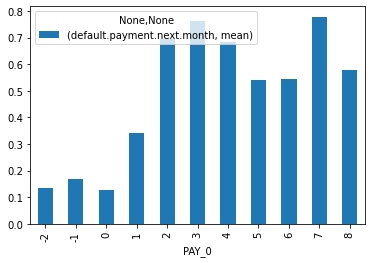

In [11]:
C.groupby('PAY_0')[['default.payment.next.month']].agg(['mean']).plot(kind = 'bar')

<AxesSubplot:xlabel='PAY_0'>

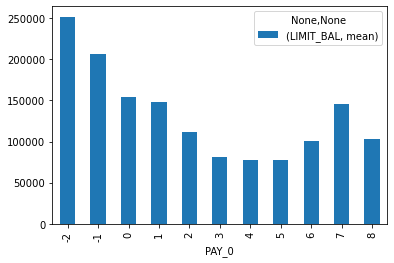

In [12]:
C.groupby('PAY_0')[['LIMIT_BAL']].agg(['mean']).plot(kind = 'bar')

<AxesSubplot:xlabel='PAY_0'>

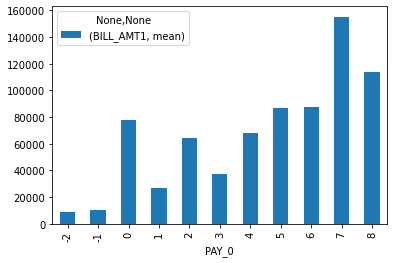

In [13]:
C.groupby('PAY_0')[['BILL_AMT1']].agg(['mean']).plot(kind = 'bar')

<AxesSubplot:xlabel='PAY_0'>

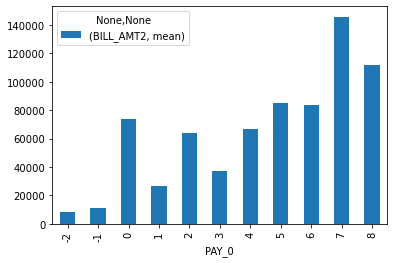

In [14]:
C.groupby('PAY_0')[['BILL_AMT2']].agg(['mean']).plot(kind = 'bar')

<AxesSubplot:xlabel='PAY_0'>

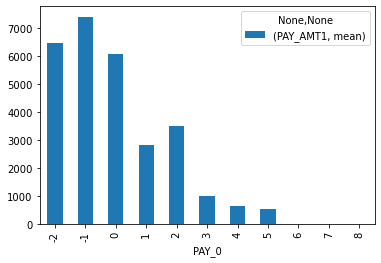

In [15]:
C.groupby('PAY_0')[['PAY_AMT1']].agg(['mean']).plot(kind = 'bar')

<AxesSubplot:xlabel='PAY_0'>

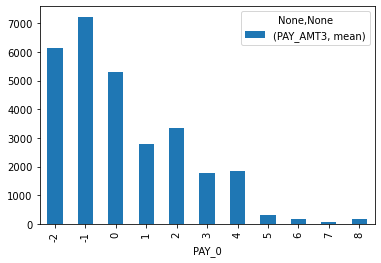

In [16]:
C.groupby('PAY_0')[['PAY_AMT3']].agg(['mean']).plot(kind = 'bar')

Valores -2 e 0 de PAY_i estão associados, em média, a um percentual menor de default, um limite maior e um pagamento maior.
O valor -2 se associa a valor de fatura mais baixo, enquando o valor 0 a um mais alto. Vou imputar esses valores usando k-nearst neighbors.

In [17]:
for p in [0, 2, 3, 4, 5, 6]:
    C.loc[(C['PAY_' + str(p)]==-2) | (C['PAY_' + str(p)]==0), 'PAY_' + str(p)] = np.nan

In [18]:
# Dummies de gênero, educação e estado civil
C['mulher'] = np.where(C['SEX']==1, 0, 1)
C['esc_pos'] = np.where(C['EDUCATION']==1, 1, 0)
C['esc_outras'] = np.where((C['EDUCATION']==3) | (C['EDUCATION']==4), 1, 0)
C['casada'] = np.where(C['MARRIAGE']==1, 1, 0)

In [19]:
C = C.rename(columns = {'PAY_0': 'PAY_1', 'default.payment.next.month': 'target'})
C = C[['target', 'mulher', 'esc_pos', 'esc_outras', 'casada', 
       'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'LIMIT_BAL',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]

In [20]:
print(C.shape)

(29601, 24)


In [21]:
C1 = C[['target']]
C2 = C.drop('target', axis=1)
nomes = C2.columns

C3 = pd.DataFrame(StandardScaler().fit_transform(C2[['LIMIT_BAL', 
                                                     'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 
                                                     'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 
                                                     'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 
                                                     'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']]), 
                  columns = nomes[10:23])

C4 = pd.concat([C2[['mulher', 'esc_pos', 'esc_outras', 'casada', 
                'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']], C3], axis = 1)

In [22]:
imputer = KNNImputer(n_neighbors=2)
C5 = pd.DataFrame(imputer.fit_transform(C4), columns = nomes).round({'PAY_1': 0, 'PAY_2': 0, 'PAY_3': 0, 
                                                                     'PAY_4': 0, 'PAY_5': 0, 'PAY_6': 0})

In [23]:
for p in [1, 2, 3, 4, 5, 6]:
    C5['pagou_data_' + str(p)] = np.where(C5['PAY_' + str(p)]==-1, 1, 0)

In [24]:
C5 = C5.drop(['PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'], axis=1)

In [25]:
C5

,mulher,esc_pos,esc_outras,casada,LIMIT_BAL,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,pagou_data_1,pagou_data_2,pagou_data_3,pagou_data_4,pagou_data_5,pagou_data_6
0,1.0,0.0,0.0,1.0,-1.135512,-0.340993,-0.225468,-0.295690,-0.307347,-0.314553,...,-0.667135,-0.671740,-0.662877,-0.652876,0,0,1,1,1,1
1,1.0,0.0,0.0,0.0,-0.365937,-0.340993,-0.211998,-0.238809,-0.243696,-0.314553,...,-0.638302,-0.620771,-0.605957,-0.598087,1,0,0,1,1,0
2,1.0,0.0,0.0,0.0,-0.596810,-0.249370,-0.190343,-0.238809,-0.243696,-0.248953,...,-0.480945,-0.448499,-0.416610,-0.391631,0,0,0,0,0,0
3,1.0,0.0,0.0,1.0,-0.904640,-0.220278,-0.167864,-0.227433,-0.237331,-0.244427,...,0.035991,-0.230680,-0.185780,-0.156445,0,0,0,0,0,0
4,0.0,0.0,0.0,1.0,-0.904640,-0.220278,1.333383,0.273118,0.265508,-0.269355,...,-0.158677,-0.345548,-0.347449,-0.331449,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29596,0.0,0.0,1.0,1.0,0.403638,0.172045,0.610911,-0.011115,-0.113404,0.013446,...,2.337318,0.699139,-0.148250,-0.384390,0,0,0,0,0,1
29597,0.0,0.0,1.0,0.0,-0.135065,-0.230116,-0.102595,0.216123,-0.299136,-0.314553,...,-0.626439,-0.531870,-0.577373,-0.652876,1,1,1,1,1,1
29598,0.0,0.0,0.0,0.0,-1.058555,-0.340993,-0.255309,0.955688,-0.040014,-0.183353,...,-0.637203,-0.346514,-0.323791,-0.327651,0,0,0,1,1,1
29599,0.0,0.0,1.0,1.0,-0.673767,4.843705,-0.107662,-0.228685,-0.184756,3.159872,...,0.426789,0.150345,-0.467567,0.169451,0,1,1,1,1,1


## 2 - Seleção de variáveis

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=15, criterion = 'entropy', max_depth = 10)
dt.fit(C5,C1)

DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=15)

In [27]:
fi_col = []
fi = []

for i,column in enumerate(C5):
    fi_col.append(column)
    fi.append(dt.feature_importances_[i])

fi_df = zip(fi_col, fi)
fi_df = pd.DataFrame(fi_df, columns = ['Feature','Feature Importance'])

fi_df = fi_df.sort_values('Feature Importance', ascending = False).reset_index()

#columns_to_keep = fi_df['Feature'][0:22]
#columns_to_keep = columns_to_keep.append(fi_df['Feature'][19:22])

fi_df

,index,Feature,Feature Importance
0,5,PAY_AMT1,0.140081
1,4,LIMIT_BAL,0.138652
2,6,PAY_AMT2,0.104597
3,12,BILL_AMT2,0.072089
4,7,PAY_AMT3,0.068743
5,13,BILL_AMT3,0.063425
6,11,BILL_AMT1,0.062828
7,15,BILL_AMT5,0.053785
8,14,BILL_AMT4,0.050722
9,16,BILL_AMT6,0.049900


Todas as variáveis contribuem para explicar a probalidade de default.

## 3 - Separação da base em treino, teste e validação

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from math import sqrt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(C5, C1, test_size=0.6, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(C1), 2))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

0.4
0.3
0.3
(11840, 23)
(11840, 1)
(8881, 23)
(8881, 1)
(8880, 23)
(8880, 1)


## 4 - Estimação dos modelos

### Regressão logística

#### Hyperparameter tuning

In [30]:
N = 20
C_List = np.geomspace(1e-5, 1e5, num=N)
CA = []
Logarithmic_Loss = []

for c in C_List:
    log_reg = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state=10, C=c)
    log_reg.fit(X_train, y_train)
    score = log_reg.score(X_test, y_test)
    CA.append(score)
    y_hat = log_reg.predict_proba(X_test)
    loss = metrics.log_loss(y_test, y_hat)
    Logarithmic_Loss.append(loss)

CA2 = np.array(CA).reshape(N,)
Logarithmic_Loss = np.array(Logarithmic_Loss).reshape(N,)

outcomes = zip(C_List, CA2, Logarithmic_Loss)

df_outcomes = pd.DataFrame(outcomes, columns = ['C_List', 'CA2','Logarithmic_Loss2'])

df_outcomes.sort_values(by = ['Logarithmic_Loss2']).reset_index()

C:\Users\prkas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prkas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prkas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\prkas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

,index,C_List,CA2,Logarithmic_Loss2
0,9,0.545559,0.771647,0.512556
1,10,1.832981,0.771647,0.512596
2,11,6.158482,0.771647,0.512613
3,12,20.691381,0.771647,0.512619
4,13,69.519280,0.771647,0.512621
5,14,233.572147,0.771647,0.512621
6,15,784.759970,0.771647,0.512622
7,16,2636.650899,0.771647,0.512622
8,17,8858.667904,0.771647,0.512622
9,18,29763.514416,0.771647,0.512622


In [31]:
# Modelo final
log_reg_f = LogisticRegression(solver = 'liblinear', penalty = 'l1', random_state=10, C=0.545559)
log_reg_f.fit(X_train, y_train)
score = log_reg_f.score(X_val, y_val)

pred_proba_t = log_reg_f.predict_proba(X_val)
loss_f = metrics.log_loss(y_val, pred_proba_t)

print("Testing Acc:", score)
print("Log Loss:", loss2)

C:\Users\prkas\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Testing Acc: 0.7748873873873874


NameError: name 'loss2' is not defined